# Costa Rican Household Poverty Level Prediction
## ECE 143 Group 7

### Import csv data and preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def load_csv(data_path):
    """
    Loads the data set and return a pandas DataFrame
    :param str data_path: Path to data csv file
    :return: pandas DataFrame read from the file
    """
    from os import path
    assert isinstance(data_path, str)
    assert path.exists(data_path), f'{data_path} does not exist!'
    assert data_path[-4:] == '.csv', 'Input file has to be csv!'
    return pd.read_csv(data_path)


def clean_data(original_data):
    """
    Filter out unwanted and invalid data from the data set
    :param DataFrame original_data: Original DataFrame read from data csv
    :return: Filtered pandas DataFrame
    """
    assert isinstance(original_data, pd.DataFrame)
    filtered_data = original_data.copy()
    filtered_data.drop(['v18q1'], axis=1, inplace=True)
    # TODO: Add other filtering
    return filtered_data


def get_training_set():
    """
    Load training.csv and clean it
    :return: Cleaned train.csv pandas DataFrame
    """
    return clean_data(load_csv('train.csv'))


data = get_training_set()

In [34]:
data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,0,1,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,0,1,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,0,2,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,0,2,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


### Group the DataFrame by 4 imcome types

In [3]:
grp = data.groupby(['Target'])
g1 = grp.get_group(1)
g2 = grp.get_group(2)
g3 = grp.get_group(3)
g4 = grp.get_group(4)

### Average number of children (0-19) and percentage of marriage

In [13]:
def print_avg(col_name):
    """
    Prints sum / number of data entries
    :param col_name: name of the column to operate on
    :type col_name: str
    """
    assert isinstance(col_name, str)
    print('Income group 1  ',end=''); print(g1[col_name].sum() / g1.shape[0])
    print('Income group 2  ',end=''); print(g2[col_name].sum() / g2.shape[0])
    print('Income group 3  ',end=''); print(g3[col_name].sum() / g3.shape[0])
    print('Income group 4  ',end=''); print(g4[col_name].sum() / g4.shape[0])
    

print('Average number of children')
print_avg('hogar_nin')
print('\nPercentage of marriage')
print_avg('estadocivil3')

Average number of children
Income group 1  2.3086092715231787
Income group 2  2.0206637445209767
Income group 3  1.6724565756823822
Income group 4  1.0758839226150767

Percentage of marriage
Income group 1  0.1695364238410596
Income group 2  0.17470256731371323
Income group 3  0.24234904880066171
Income group 4  0.3110406937958639


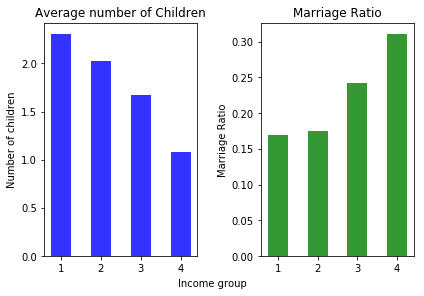

In [33]:
fig, axes = plt.subplots(1,2)
bar_width = 0.5
opacity = 0.8
index = [1,2,3,4]
avg_child = [ig['hogar_nin'].sum()/ig.shape[0] for ig in [g1,g2,g3,g4]]
marriage_perc = [ig['estadocivil3'].sum()/ig.shape[0] for ig in [g1,g2,g3,g4]]

axes[0].bar(index, avg_child, bar_width, alpha=opacity, color='b')
axes[0].set_title('Average number of Children'); axes[0].set_ylabel('Number of children')

axes[1].bar(index, marriage_perc, bar_width, alpha=opacity, color='g')
axes[1].set_title('Marriage Ratio'); axes[1].set_ylabel('Marriage Ratio')

fig.text(0.5, 0, 'Income group', ha='center', va='center')
fig.tight_layout()

### Average monthly rent (if applicable)

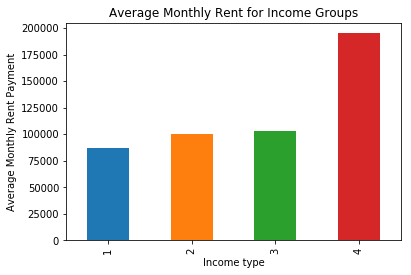

In [6]:
pd.Series([g1['v2a1'].dropna()[lambda x:x!=0].mean(),
          g2['v2a1'].dropna()[lambda x:x!=0].mean(),
          g3['v2a1'].dropna()[lambda x:x!=0].mean(),
          g4['v2a1'].dropna()[lambda x:x!=0].mean()],
          index=[1,2,3,4]).plot.bar()
plt.title('Average Monthly Rent for Income Groups'); plt.xlabel('Income type'); plt.ylabel('Average Monthly Rent Payment');

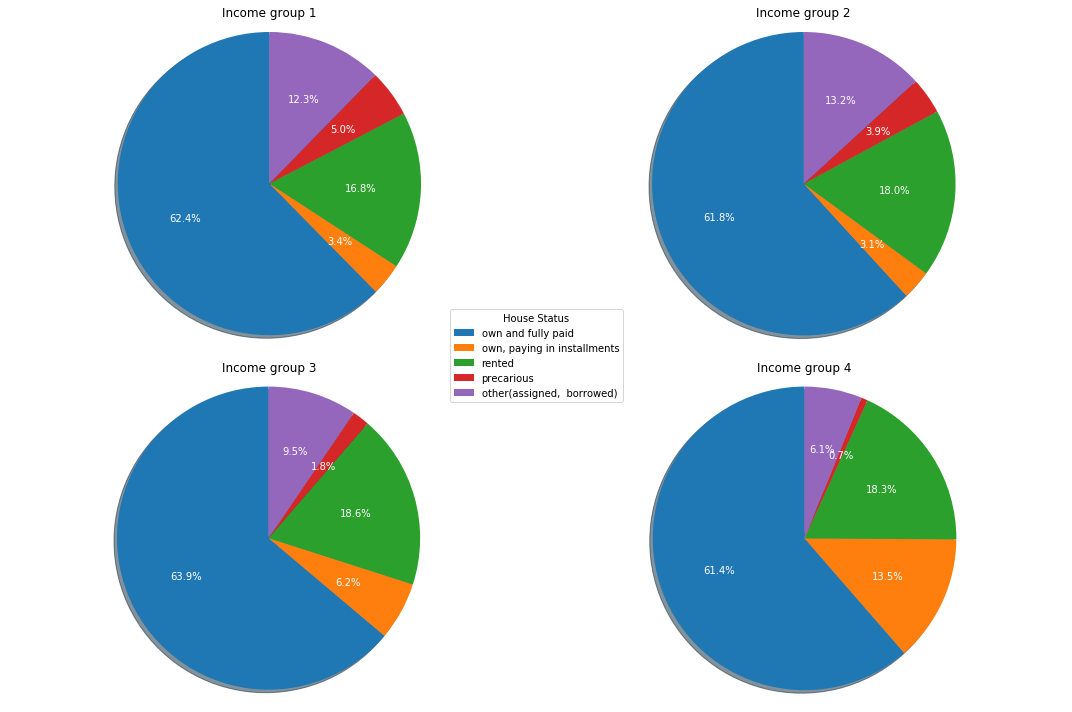

In [7]:
# tipovivi1, =1 own and fully paid house
# tipovivi2, =1 own,  paying in installments
# tipovivi3, =1 rented
# tipovivi4, =1 precarious
# tipovivi5, =1 other(assigned,  borrowed)

def house_status(group_df,ax):
    """
    Count and plot the housing payments type percentage of each income level group
    :param group_df: Dataframe of the imcome group
    :type group_df: pandas DataFrame
    :param ax: Axis to be plotted on
    :type ax: pyplot axis
    :return: pie plot wedges and labels for legend
    """
    g_length = group_df['tipovivi1'].shape[0]
    g_cond = [group_df[col].value_counts().sort_index() for col in ['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']]
    sizes = [g_type[1]/g_length for g_type in g_cond]
    labels = 'own and fully paid', 'own, paying in installments', 'rented', 'precarious', 'other(assigned,  borrowed)'
    wedges, texts, autotexts = ax.pie(sizes, autopct='%1.1f%%', shadow=True, startangle=90,textprops=dict(color="w"))
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    return wedges, labels
    

fig, axes = plt.subplots(2,2)
house_status(g1,axes[0,0])
house_status(g2,axes[0,1])
house_status(g3,axes[1,0])
wed, lbl = house_status(g4,axes[1,1])
fig.legend(wed, lbl,
      title="House Status",
      loc="center")
axes[0,0].set_title('Income group 1');axes[0,1].set_title('Income group 2')
axes[1,0].set_title('Income group 3');axes[1,1].set_title('Income group 4')
fig.set_size_inches(15, 10)
fig.tight_layout()

In [8]:
# lugar1, =1 region Central
# lugar2, =1 region Chorotega
# lugar3, =1 region PacÃƒÂ­fico central
# lugar4, =1 region Brunca
# lugar5, =1 region Huetar AtlÃƒÂ¡ntica
# lugar6, =1 region Huetar Norte

